___
# <font color= #003366> **Proyecto Final** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Priscila Cervantes Ramírez 750722 & Mónica Ibarra Herrera 750601` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Análisis Estadístico Multivariable` </font>
___


### <font color=  #003366> **Introducción**</font>

En el transcurso del semestre se enseñaron múltiples tópicos en torno a los temas probabilísticos, análisis de datos entre otros, selección de variables, regresión lineal, regresión logística(clasificación), PCA, clustering, y más. Con ello, se realizará un proyecto implementando alguno de los temas dichos anteriormente para poder plasmar nuestros conocimientos y demostrar nuestras habilidades en la resolución y adaptación de datos reales para poder obtener los resultados deseados dependiendo de nuestra elección.

Se trabajará a lo largo del proyecto con una base de datos obtenida de Kaggle sobre los factores que influyen en los gasto méidcos de los pacientes, lo que a nosotras como analistas nos va ayudar a comprender de una mejor manera la dinámica del sector de la salud, por lo que haremos regresiones lineales para predecir el costo médico.

Para respaldar el trabajo se adjuntarán gráficas y código en este archivo, explicaciones breves justificando las decisiones tomadas para la resolución del problema y visuales para una mejor comprensión de los datos.

El propósito del proyecto es aplicar diferentes temas vistos a lo largo del semestre para poder hacer comparaciones entre modelos y ver cómo distintos complementos pueden beneficiar a la regresión lineal. Haremos una regresión lineal múltiple, verificaremos los supuestos, evaluaremos las métricas para posteriormente comparar con distintos modelos. Después de la regresión implementaremos selección de variables basado en los métodos de envoltura, específicamente selección hacia adelante y hacia atrás. Finalmente compararemos las métricas de los modelos y presentaremos los hallazgos y conclusiones.

Se realizará el trabajo en equipo congeniando conocimientos y técnicas de desarrollo adquiridos en semestres pasados y claro, en este semestre de igual manera. 


### <font color=  #003366> **Objetivo**</font>

El objetivo principal del proyecto final tiene como finalidad que se aplique los conocimientos adquiridos a través del curso, integrando tanto la parte de programación (análisis y modelado de datos) como el desarrollo de habilidades blandas mediante una presentación de estilo empresarial. De igual manera se evaluará tanto los resultados técnicos como la capacidad de comunicar de manera clara y persuasiva los hallazgos y decisiones basadas en el análisis.
Por otro lado, el objetivo específico de este proyecto, trabajando con una base de datos de nuestra elección siendo ‘Medical_cost_dataset’, es encontrar el costo final dependiendo de diferentes factores(variables) del seguro médico, así como comparar los distintos modelos que se presentarán más adelnate.


### <font color=  #003366> **Metodología**</font>

El proyecto se llevará a cabo en diferentes etapas con el objetivo de construir modelos de regresión que sean capaces de predecir el costo médico de los pacientes a partir de distintas variables. 

A continuación, se describen los pasos a seguir:

**1. Recolección y preparación de datos**

Se utilizará un conjunto de datos que incluye variables como edad, sexo, índice de masa corporal, número de hijos o dependientes cubiertos por el seguro médico, tabaquismo, región y el cargo médico (variable objetivo). Se realizará una la codificación de variables categóricas a variables dummy, eliminando la primera clase de cada una de las variables categóricas para evitar mutlicolinealidad.

**2.Análisis exploratorio de datos (EDA)**

Se generarán estadísticas descriptivas y visualizaciones (boxplots, histogramas) para identificar outliers mediante el método del rango intercaurtílico (IQR) y distribución de las variables.

**3.Modelado predictivo**

Se implementarán tres enfoques de regresión lineal:

- Regresión múltiple simple con todas las variables.

- Regresión con selección de variables (método de envoltura), eligiendo las características más importantes.

- Regresión con reducción de dimensionalidad usando PCA, estandarizando los datos

Evaluación del desempeño
Para cada modelo, se verificará si se cumplen los supuestos y se calcularán las métricas MAE (error absoluto medio), MSE (error cuadrático medio) y R2. También se obtendrán los criterios de AIC y BIC para comparar la eficiencia y complejidad de los modelos.



### <font color=  #003366> **Descripción del conjunto de datos**</font>

Con el siguiente dataset se puede encontrar los costos y gastos médicos con el conjunto de datos de costos médicos. Este conjunto de datos ofrece información valiosa sobre los factores que influyen en los cargos médicos, lo que permite a investigadores, analistas y profesionales de la salud comprender mejor la dinámica del sector salud.
La información con la que estaremos trabajando se recopiló de la plataforma Kaggle, de la siguiente fuente:
https://www.kaggle.com/datasets/nanditapore/medical-cost-dataset.

Para dar un mejor contexto de dicha base de datos, se cuenta con las siguientes variables:

- ID: Identificador único asignado a cada individuo. 

- AGE: Edad del paciente.

- SEX: Sexo del paciente.

- BMI: Índice de masa corporal del paciente, indicando el estatus del peso relativo. 

- CHILDREN: Número de hijos o dependientes cubiertos por el seguro médico. 

- SMOKER: Indicador binario si fuma o no el paciente.

- REGION: Región geográfica del paciente.

- CHARGES: Los gastos médicos incurridos por la paciente, servirá como variable objetivo.



### <font color=  #c9d996> **Regresión lineal**</font>

#### <font color= #96d9cf> **Preprocesamiento de datos**</font>

In [10]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from scipy import stats
from statsmodels.compat import lzip
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pingouin as pg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mglearn
from sklearn.decomposition import PCA

In [11]:
# Cargar los datos
df = pd.read_csv('medical_cost.csv')
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Se puede observar que contamos con 1338 entradas y no hay datos nulos en el dataset.

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [16]:
# Codificación de variables numéricas
df = pd.get_dummies(df, drop_first=True, dtype=int)
df

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,16884.92400,0,1,0,0,1
1,2,18,33.770,1,1725.55230,1,0,0,1,0
2,3,28,33.000,3,4449.46200,1,0,0,1,0
3,4,33,22.705,0,21984.47061,1,0,1,0,0
4,5,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,1334,50,30.970,3,10600.54830,1,0,1,0,0
1334,1335,18,31.920,0,2205.98080,0,0,0,0,0
1335,1336,18,36.850,0,1629.83350,0,0,0,1,0
1336,1337,21,25.800,0,2007.94500,0,0,0,0,1


Se realizó codificación dummies a las variables categóricas, se quitó la primera de las clases de cada variable categórica para evitar multicolinealidad, es decir para evitar que una o más variables independientes estén fuertemente correlacionadas entre sí, ya que si existe multicolinealidad se le dificulta al modelo  separar los efectos individuales de cada variable sobre la variable objetivo, en este caso los gastos.

##### <font color= #d4b1e6> **Análisis Exploratorio Descriptivo** </font>

##### <font color= #96d9cf> **Estadísticas Descriptivas**</font>

In [17]:
df.describe()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,386.391641,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,1.000000,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


Nos arroja las estadísticas descriptivas de las variables con las que estamos trabajando, como el promedio, la desviación estandar, los cuartiles entre más.

Por ejemplo podemos ver que el máximo gasto médico que hay en el dataset es de $63770.428010, mientras que el más bajo es de $1121.873900 y que el promedio de los gastos es de $13270.422265. 

Otro punto interesante es la edad mínima de los pacientes registrados es de 18 años, mientras que la máxima es de 64 años, por lo que el dataset tiene información sólo de adultos.

Analizando también el índice de masa corporal podemos ver que el mínimo es de 15 y el máximo es de 53. Según la OMS, el IMC de una persona con peso normal o saludable es entre 18.5 y 24.9. Para las personas que su IMC está entre 25 y 29.9 se encuentran en la categoría de sobrepeso. Para las personas que su IMC es superior a 30 se encuentran en el rango de obesidad.

Analizando el IMC filtraremos el dataset solo para visualizar cómo se comportan los gastos médicos según si la persona tiene peso normal, sobrepeso u obesidad

###### <font color= #96d9cf> **Personas con peso normal**</font>

In [107]:
df_peso_normal = df[df['bmi']<=24.9]
df_peso_normal

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
3,4,33,22.705,0,21984.47061,1,0,1,0,0
15,16,19,24.600,1,1837.23700,1,0,0,0,1
17,18,23,23.845,0,2395.17155,1,0,0,0,0
26,27,63,23.085,0,14451.83515,0,0,0,0,0
28,29,23,17.385,1,2775.19215,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1304,1305,42,24.605,2,21259.37795,1,1,0,0,0
1306,1307,29,21.850,0,16115.30450,0,1,0,0,0
1314,1315,30,23.655,3,18765.87545,0,1,1,0,0
1316,1317,19,20.600,0,1731.67700,0,0,0,0,1


Podemos ver que dentro del dataset de las 1338 personas que tenemos 242 tienen un peso normal según su IMC, representando el 18.09% del total.

In [108]:
df_peso_normal.describe()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,713.586777,36.384298,22.169483,1.111570,10253.276662,0.471074,0.227273,0.285124,0.165289,0.210744
std,385.559467,13.664817,2.093794,1.242384,7515.736759,0.500197,0.419939,0.452409,0.372211,0.408682
min,4.000000,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,390.750000,24.000000,20.800000,0.000000,3851.057912,0.000000,0.000000,0.000000,0.000000,0.000000
50%,755.500000,34.500000,22.610000,1.000000,8593.062850,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1030.750000,47.000000,23.845000,2.000000,14542.829112,1.000000,0.000000,1.000000,0.000000,0.000000
max,1329.000000,64.000000,24.890000,5.000000,35069.374520,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que los gastos mínimos para una persona con peso normal es de $1121.873 y el máximo es de $14542.82

###### <font color= #96d9cf> **Personas con sobrepeso**</font>

In [105]:
df_sobrepeso = df[(df['bmi']>24.9)&(df['bmi']<29.9)]
df_sobrepeso

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,16884.92400,0,1,0,0,1
4,5,32,28.880,0,3866.85520,1,0,1,0,0
5,6,31,25.740,0,3756.62160,0,0,0,1,0
7,8,37,27.740,3,7281.50560,0,0,1,0,0
8,9,37,29.830,2,6406.41070,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1321,1322,62,26.695,0,28101.33305,1,1,0,0,0
1324,1325,31,25.935,1,4239.89265,1,0,1,0,0
1330,1331,57,25.740,2,12629.16560,0,0,0,1,0
1336,1337,21,25.800,0,2007.94500,0,0,0,0,1


Podemos ver que de las 1338 personas, 377 tienen sobrepeso según su IMC, representando el 28.18% del total.

In [106]:
df_sobrepeso.describe()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,658.172414,38.816976,27.508077,1.068966,11030.331700,0.493369,0.190981,0.281167,0.198939,0.259947
std,402.024834,13.420409,1.406232,1.218439,8030.463153,0.500620,0.393597,0.450166,0.399733,0.439188
min,1.000000,18.000000,24.970000,0.000000,1252.407000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,292.000000,27.000000,26.315000,0.000000,4687.797000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,649.000000,38.000000,27.645000,1.000000,8703.456000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1007.000000,50.000000,28.690000,2.000000,15828.821730,1.000000,0.000000,1.000000,0.000000,1.000000
max,1338.000000,64.000000,29.830000,5.000000,38245.593270,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que los gastos mínimos para una persona con sobrepeso es de $1252.40 y el máximo es de $38245.59 superando el gasto máximo para una persona con peso normal por $23702.77.

###### <font color= #96d9cf> **Personas con obesidad**</font>

In [111]:
df_obesidad = df[df['bmi']>=29.9]
df_obesidad

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1,2,18,33.77,1,1725.55230,1,0,0,1,0
2,3,28,33.00,3,4449.46200,1,0,0,1,0
6,7,46,33.44,1,8240.58960,0,0,0,1,0
12,13,23,34.40,0,1826.84300,1,0,0,0,1
13,14,56,39.82,0,11090.71780,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1331,1332,23,33.40,0,10795.93733,0,0,0,0,1
1332,1333,52,44.70,3,11411.68500,0,0,0,0,1
1333,1334,50,30.97,3,10600.54830,1,0,1,0,0
1334,1335,18,31.92,0,2205.98080,0,0,0,0,0


Por último podemos ver que las personas que tienen obesidad son 719, representando el 53.73% del total. Efectivamente como vimos en las estadísticas descriptivas más del 50% de las personas dentro del dataset tienen obesidad. El 81.91% del dataset tiene sobrepeso u obesidad.

In [113]:
df_obesidad.describe()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,660.600834,40.361613,35.176725,1.102921,15460.496506,0.522949,0.204451,0.208623,0.346314,0.244784
std,377.721664,14.369768,4.098561,1.187436,14486.090909,0.499821,0.403580,0.406607,0.476126,0.430259
min,2.000000,18.000000,29.900000,0.000000,1131.506600,0.000000,0.000000,0.000000,0.000000,0.000000
25%,346.000000,27.000000,32.005000,0.000000,5143.404650,0.000000,0.000000,0.000000,0.000000,0.000000
50%,646.000000,41.000000,34.210000,1.000000,9880.068000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,982.000000,53.000000,37.367500,2.000000,19585.027450,1.000000,0.000000,0.000000,1.000000,0.000000
max,1336.000000,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que los gastos mínimos para una persona con obesidad es de $1131.50 y el máximo es de $63770.42 superando el gasto máximo para una persona con peso normal por $49227.6 y para una persona con sobrepeso por $25524.83

##### <font color= #96d9cf> **Histogramas**</font>

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'sex_male'}>],
       [<Axes: title={'center': 'smoker_yes'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

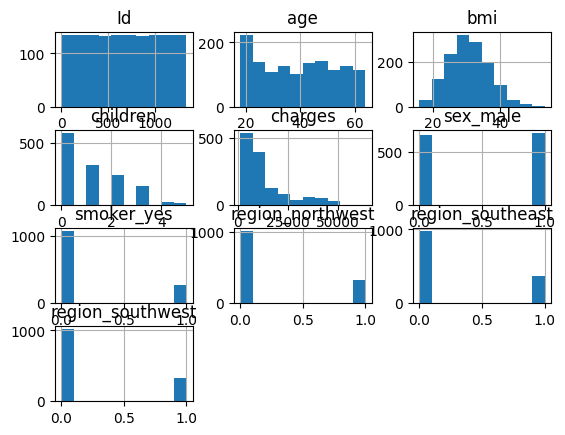

In [19]:
df.hist()

A través de histogramas podemos ver las distintas distribuciones de nuestras variables. 

##### <font color= #96d9cf> **Box-plots y outliers**</font>

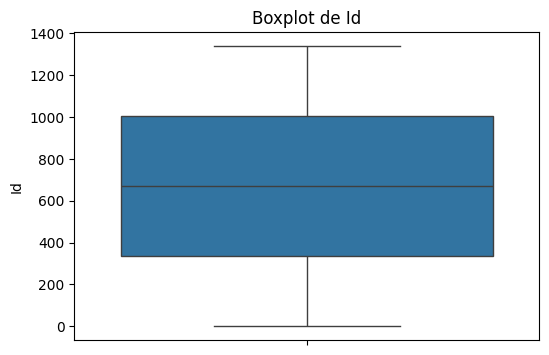

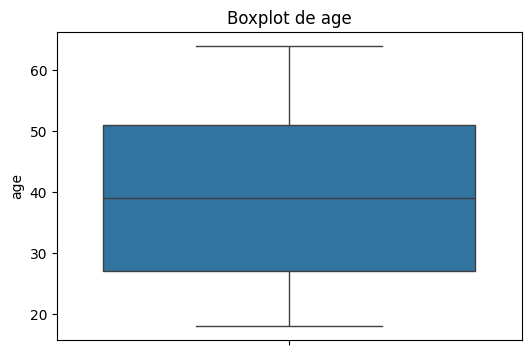

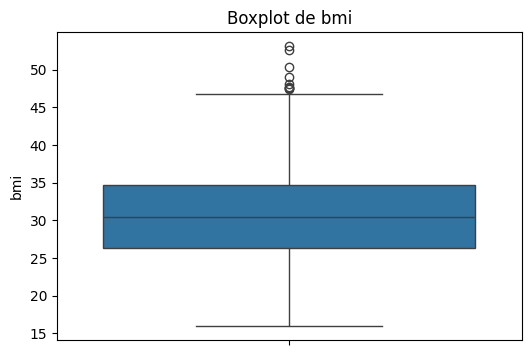

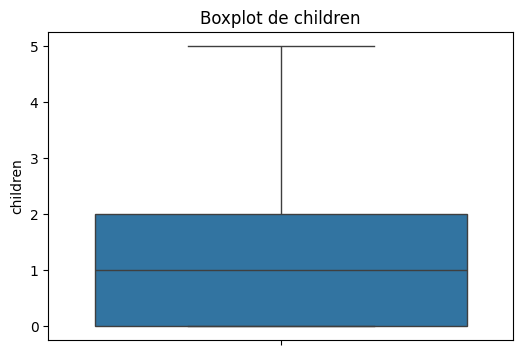

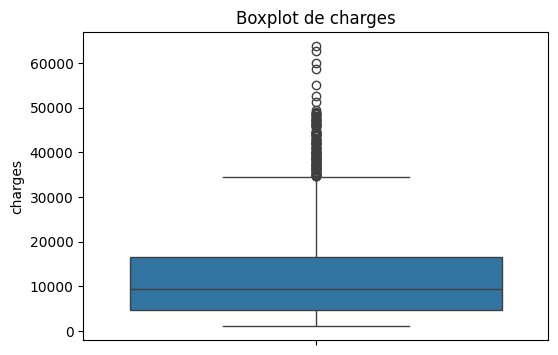

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [21]:
def outliers(df, columnas=None):
    if columnas is None:
        columnas = df.select_dtypes(include='number').columns

    resultados = []

    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        n_outliers = ((df[col] < lim_inf) | (df[col] > lim_sup)).sum()
        resultados.append({'Variable': col, 'Outliers': n_outliers})

    return pd.DataFrame(resultados).sort_values(by='Outliers', ascending=False).reset_index(drop=True)


In [22]:
outliers_detectados = outliers(df[['age', 'bmi', 'children', 'charges']])
outliers_detectados

,Variable,Outliers
0,charges,139
1,bmi,9
2,age,0
3,children,0


A través de las gráficas de caja y bigotes podemos visualizar las variables que tienen valores atípicos, podemos ver que las variables con outliers son el índice de masa corporal con 9, representando aproximadamente el 0.67% de los datos y los gastos médicos con 139 outliers, representando aproximadamente el 10% de los datos. Al no pasar el 10% de los datos no se aplicará nada a los outliers

##### <font color= #96d9cf> **Matriz de correlación**</font>

<Axes: >

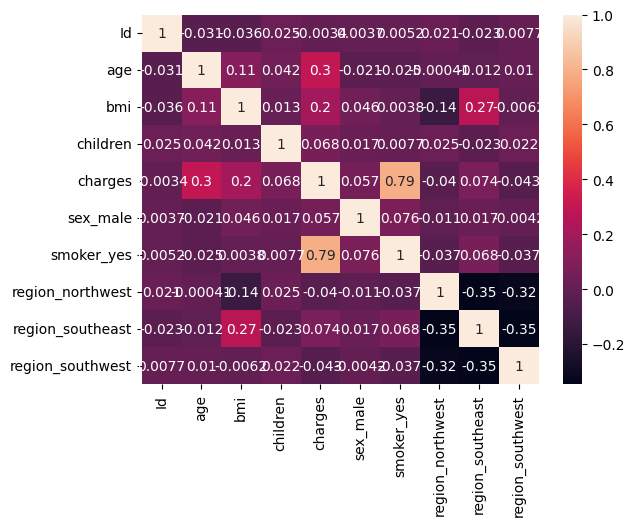

In [23]:
# Matriz de correlación
sns.heatmap(df.corr(), annot=True)

Analizando la matriz de correlación, las variables de si el paciente fuma y edad son las variables que más correlación tienen con la variable objetivo, en este caso los cargos de los gastos médicos.

##### <font color= #FFD8A8> **ANOVA** </font>

El ANOVA es una técnica estadística que se utiliza para evaluar si existen diferencias significativas en las medias de tres o más grupos en un conjunto de datos. En este caso como parte del Análisis Exploratorio, aplicaremos ANOVA de 1 factor para visualizar si la región del paciente influye en los gastos médicos.

In [24]:
# Cargar los datos
df2 = pd.read_csv('medical_cost.csv')
df2

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# Seleccionar clases específicas para el ANOVA 
regiones = ['southwest', 'southeast', 'northwest', 'northeast']
df_filtered = df2[df2['region'].astype(str).isin(regiones)]

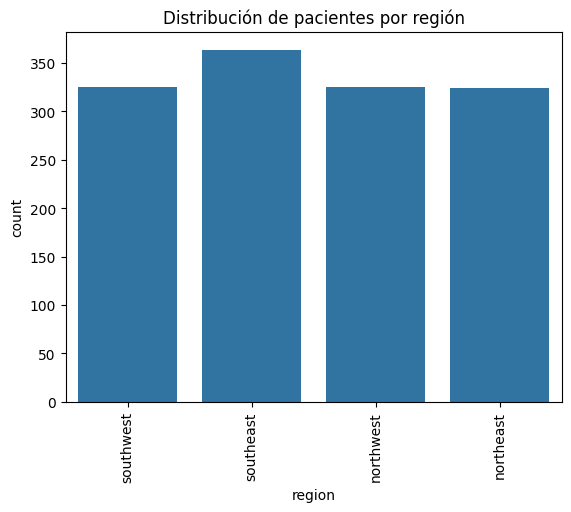

In [26]:
# Gráfico de conteo por clase
sns.countplot(data=df_filtered, x='region')
plt.xticks(rotation=90)
plt.title("Distribución de pacientes por región")
plt.show()

In [27]:
#%% Selección de muestra balanceada
sample_size = 200
sample_list = []

for cls in regiones:
    sample = df_filtered[df_filtered['region'] == cls].sample(sample_size, random_state=42)
    sample_list.append(sample)

sample = pd.concat(sample_list)

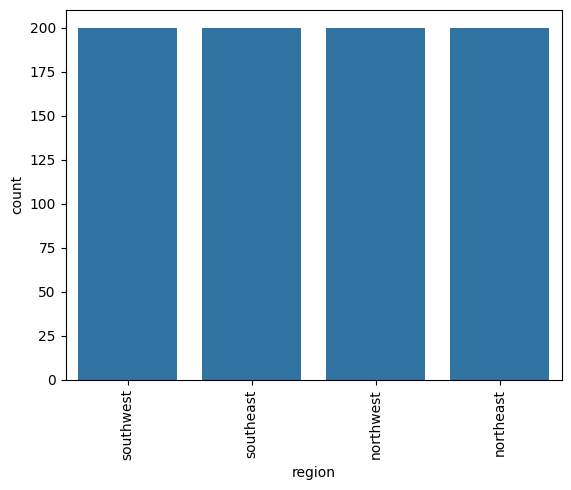

In [28]:
# Verificar distribución
sns.countplot(data=sample, x='region')
plt.xticks(rotation=90)
plt.show()

Se realizó un balanceo de muestras de las clases para que las variables se encuentren en el mismo rangos y que sea más fácil trabajar con ellas.

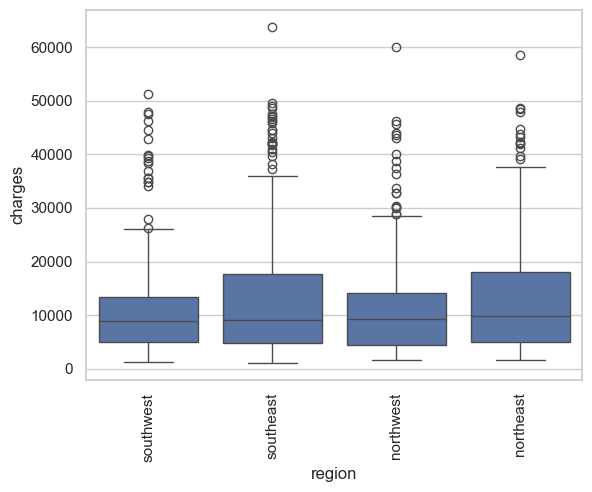

In [29]:
#BoxPlot
sns.set(style="whitegrid")
sns.boxplot(x='region', y='charges', data=sample)
plt.xticks(rotation=90)
plt.show()

Se puede observar por medio del Boxplot que todas las variables cuentan con valores extremos (como lo habíamos visto anteriormente que existen atípicos en los gastos médicos)

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

En este caso los supuestos den ANOVA son los siguientes:
- La variable dependiente, en este caso los gastos médicos debe medirse al menos a nivel intervalo lo cual sí se cumple.
- Los valores de la muestra vienen de una distribución normal y los residuos deben seguir una distribución normal, este supuesto se verificará con la prueba de Normalidad de Shapiro-Wilk.
- Tiene que haber homocedasticidad, es decir que la varianza de los residuos debe ser constante en todos los niveles del factor categórico, este supuesto se verificará con las pruebas de Levene.

In [30]:
#%% Cumplimiento de supuestos
#Normalidad prueba de Shapiro-Wilk
#Ho:Normalidad(p>0.05)
#H1: No normalidad (p<0.05)
normality_test = pg.normality(sample, dv='charges', group='region')
print("Prueba de Normalidad (Shapiro-Wilk):\n", normality_test)

Prueba de Normalidad (Shapiro-Wilk):
                   W          pval  normal
region                                   
southwest  0.790959  1.237692e-15   False
southeast  0.790271  1.164675e-15   False
northwest  0.811898  8.465966e-15   False
northeast  0.833699  7.420494e-14   False


Como podemos ver, con la prueba de Shapiro-Wilk que los residuos no son normales.

In [31]:
#%%Homocedasticidad prueba de Levene (sin normalidad)
#Ho:Homocedasticidad (p>0.05)
#H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(sample, dv='charges', 
                    group='region',method='levene')

,W,pval,equal_var
levene,2.591719,0.051649,True


Al obtener mediante la prueba de Shapiro-Wilk que no son normales los residuos, usamos la prueba de Levene que no necesita normalidad y nos indica que los residuos son homocedásticos.

In [32]:
#%% One way ANOVA
# Typ = 2 calcula las sumas de cuadrados de tipo II, que es apropiado para ANOVAs balanceados y desequilibrados
model =ols('charges ~ region', data=sample).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
print("\nTabla ANOVA:")
print(anova_table)


Tabla ANOVA:
                sum_sq     df         F    PR(>F)
region    7.863965e+08    3.0  1.926381  0.123788
Residual  1.083156e+11  796.0       NaN       NaN


Basándonos en el ANOVA podemos ver que **no** existe una diferencia significativa entre las diferentes regiones de los pacientes respecto al gasto médico, es decir que no tiene un efecto significativo en cuanto al costo médico del paciente.

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.926
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.124
Time:                        18:43:17   Log-Likelihood:                -8624.6
No. Observations:                 800   AIC:                         1.726e+04
Df Residuals:                     796   BIC:                         1.728e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.376e+04    

In [34]:
#%%Comparación múltiple Prueba de Tukey
comp = mc.MultiComparison(sample['charges'],sample['region'])
post_hoc_res = comp.tukeyhsd()
print("\nComparaciones múltiples (Tukey):")
print(post_hoc_res.summary())


Comparaciones múltiples (Tukey):
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest -1808.4858 0.4079 -4811.6301 1194.6585  False
northeast southeast   161.3724 0.9991 -2841.7719 3164.5167  False
northeast southwest -1981.8197 0.3249  -4984.964 1021.3247  False
northwest southeast  1969.8582 0.3303 -1033.2861 4973.0025  False
northwest southwest  -173.3339 0.9988 -3176.4782 2829.8104  False
southeast southwest -2143.1921 0.2566 -5146.3364  859.9522  False
-----------------------------------------------------------------


Comprobando con prueba de Tukey, podemos ver que el promedio de los costos médicos no cambia significativamente entre las diferentes regiones (northeast, northwest, southeast, southwest), por lo tanto la región en donde vive el paciente no influye en los gastos médicos.

##### <font color= #FFD8A8> **ANCOVA** </font>

Es una técnica estadística que permite comparar medias de diferentes grupos ajustando por una o más variables continuas llamadas covariables, estas covariables son factores adicionales que pueden influir en la variable. En este caso nuestra covariable será la edad del paciente y el factor como en el ANOVA será la región.

##### <font color= #96d9cf> **ANCOVA con interacción covariable:factor**</font>

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

Además de los supuestos del ANOVA y de Regresión lineal que se verán más adelante, es necesario el efecto aditivo de la covariable, esto quiere decir que la pendiente tiene que ser la misma en todos los grupos, lo cual significa que afecte de la misma manera a todos los grupos y para esto es necesario que la interacción entre la covariable (edad) y el factor (región) no sea significativa.

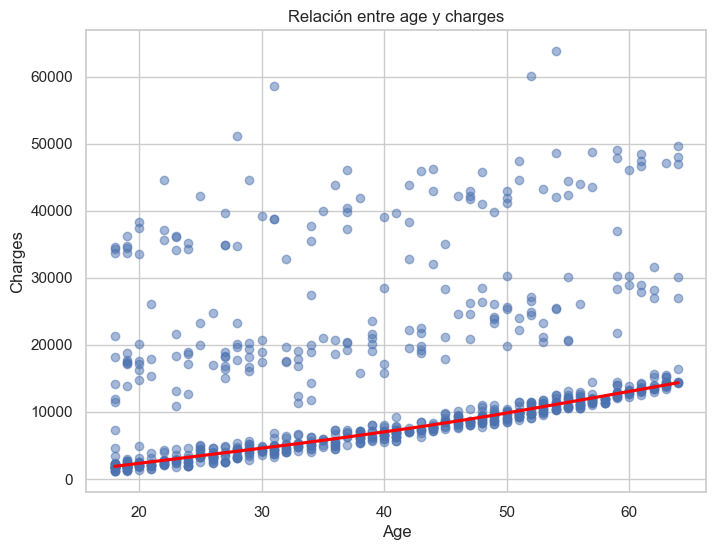

In [35]:
#%% Verificar la relación lineal entre la covariable (edad) y costos médicos
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='charges', data=sample, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Relación entre age y charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Analizando la gráfica, existe una relación lineal entre la edad y los gastos médicos del paciente.

In [36]:
#%% ANCOVA: Modelo con interacción entre edad y region
# Para evaluar si la pendiente entre edad y charges difiere entre clases
model_ancova_int = ols('charges ~ age * region', data=sample).fit()
anova_table_ancova_int = sm.stats.anova_lm(model_ancova_int, typ=2)
print("Tabla ANCOVA (con interacción age * region):")
print(anova_table_ancova_int)
# Si la interacción no es significativa, se opta por el modelo sin interacción

Tabla ANCOVA (con interacción age * region):
                  sum_sq     df          F        PR(>F)
region      8.012009e+08    3.0   2.161776  9.113351e-02
age         9.990195e+09    1.0  80.865714  1.753146e-18
age:region  4.813066e+08    3.0   1.298647  2.737203e-01
Residual    9.784412e+10  792.0        NaN           NaN


Viendo el ANCOVA podemos ver que la interacción entre la edad y la región del paciente no es significativa y que el supuesto se cumple.

In [37]:
print(model_ancova_int.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.02
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.39e-16
Time:                        18:43:18   Log-Likelihood:                -8584.0
No. Observations:                 800   AIC:                         1.718e+04
Df Residuals:                     792   BIC:                         1.722e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3

In [38]:
means_adjusted = model_ancova_int.predict(sample)
sample['adjusted_charges'] = sample['charges'] - (sample['age'] - sample['age'].mean()) * model_ancova_int.params['age']

comp = mc.MultiComparison(sample['adjusted_charges'], sample['region'])
post_hoc_res = comp.tukeyhsd()
print("Comparaciones múltiples (Tukey) para las medias ajustadas por age:")
print(post_hoc_res.summary())

Comparaciones múltiples (Tukey) para las medias ajustadas por age:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -1902.717 0.3181 -4764.0678  958.6338  False
northeast southeast    27.1252    1.0 -2834.2256  2888.476  False
northeast southwest  -2067.015 0.2464 -4928.3659  794.3358  False
northwest southeast  1929.8422 0.3055  -931.5086  4791.193  False
northwest southwest   -164.298 0.9988 -3025.6488 2697.0528  False
southeast southwest -2094.1402 0.2356  -4955.491  767.2106  False
-----------------------------------------------------------------


Comprobando con la prueba de Tukey, podemos ver que en ningún grupo de regiones existen diferencias significativas en sus medias ajustadas.

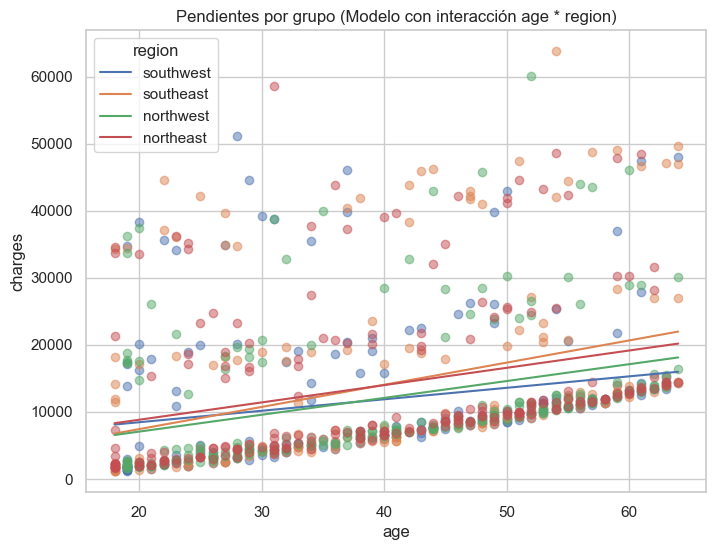

In [39]:
#%% Gráfica de las pendientes

# Definir un rango de valores para edad
age_range = np.linspace(sample['age'].min(), sample['age'].max(), 100)

plt.figure(figsize=(8,6))

# Iterar sobre cada region
for group in sample['region'].unique():
    # Crear un DataFrame para predicciones: se fija 'region' y se varía age
    new_data = pd.DataFrame({'age': age_range, 'region': group})
    
    # Predecir fare usando el modelo con interacción
    pred = model_ancova_int.predict(new_data)
    
    # Graficar la línea de predicción para este grupo
    plt.plot(age_range, pred, label=group)
    
    # Graficar los datos reales para el grupo
    group_data = sample[sample['region'] == group]
    plt.scatter(group_data['age'], group_data['charges'], alpha=0.5)

plt.xlabel('age')
plt.ylabel('charges')
plt.title('Pendientes por grupo (Modelo con interacción age * region)')
plt.legend(title='region')
plt.show()


Podemos observar que las pendientes sí tienen un efceto en cuanto a los gastos médicos de los pacientes.

##### <font color= #96d9cf> **ANCOVA sin interacción de covariable:factor**</font>

In [40]:
#%% ANCOVA: Modelo básico sin interacción
# Se ajusta el modelo: charges ~ age (covariable) + region (factor)
model_ancova = ols('charges ~ age + region', data=sample).fit()
anova_table_ancova = sm.stats.anova_lm(model_ancova, typ=2)
print("Tabla ANCOVA (sin interacción):")
print(anova_table_ancova)

Tabla ANCOVA (sin interacción):
                sum_sq     df          F        PR(>F)
region    8.012009e+08    3.0   2.159342  9.142086e-02
age       9.990195e+09    1.0  80.774683  1.815228e-18
Residual  9.832542e+10  795.0        NaN           NaN


Viendo en ANCOVA sin interacción podemos ver que la región no tiene un efecto significativo en los gastos del paciente como se había mencionado anteriormente en el ANOVA. Por otro lado la edad del paciente sí es significativa y tiene un gran impacto en el costo médico.

In [41]:
# Evaluar los residuos del modelo ANCOVA para normalidad
residuals = model_ancova.resid
normality_test = pg.normality(residuals)
print("Prueba de Normalidad de los residuos del modelo ANCOVA:")
print(normality_test)

Prueba de Normalidad de los residuos del modelo ANCOVA:
          W          pval  normal
0  0.676036  1.884992e-36   False


Por la prueba de normalidad de residuos del modelo ANCOVA, obtuvimos que no son normales. 

In [42]:
print(model_ancova.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.78
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.48e-17
Time:                        18:43:19   Log-Likelihood:                -8585.9
No. Observations:                 800   AIC:                         1.718e+04
Df Residuals:                     795   BIC:                         1.721e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3836.3544   1

In [43]:
#%% Comparación múltiple (post hoc) para el factor 'passenger_class' en el modelo ANCOVA sin interacción
# Se obtienen las medias ajustadas (estimadas) para cada grupo
means_adjusted = model_ancova.predict(sample)
sample['adjusted_charges'] = sample['charges'] - (sample['age'] - sample['age'].mean()) * model_ancova.params['age']

comp = mc.MultiComparison(sample['adjusted_charges'], sample['region'])
post_hoc_res = comp.tukeyhsd()
print("Comparaciones múltiples (Tukey) para las medias ajustadas por age:")
print(post_hoc_res.summary())

Comparaciones múltiples (Tukey) para las medias ajustadas por age:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest -1901.0069 0.3188 -4762.3081  960.2943  False
northeast southeast    29.5615    1.0 -2831.7397 2890.8627  False
northeast southwest -2065.4689  0.247 -4926.7701  795.8323  False
northwest southeast  1930.5684 0.3051  -930.7328 4791.8696  False
northwest southwest   -164.462 0.9988 -3025.7632 2696.8392  False
southeast southwest -2095.0304 0.2353 -4956.3316  766.2708  False
-----------------------------------------------------------------


Podemos ver que en ningún grupo existen diferencias significativas en sus medias ajustadas para el factor 'region' en el modelo de ANCOVA sin interacción.

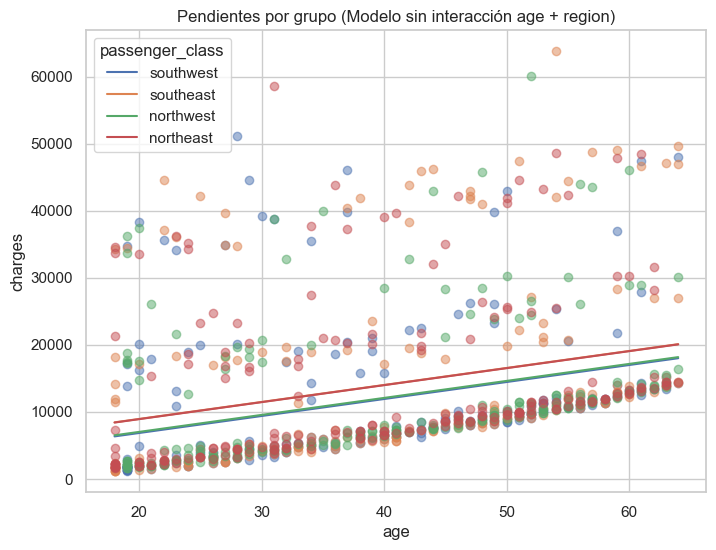

In [44]:
#%% Definir un rango de valores para age
age_range = np.linspace(sample['age'].min(), sample['age'].max(), 100)

plt.figure(figsize=(8,6))

# Iterar sobre cada nivel de 'region'
for group in sample['region'].unique():
    # Crear un DataFrame para predicciones: se fija 'region' y se varía age
    new_data = pd.DataFrame({'age': age_range, 'region': group})
    
    # Predecir charges usando el modelo con interacción
    pred = model_ancova.predict(new_data)
    
    # Graficar la línea de predicción para este grupo
    plt.plot(age_range, pred, label=group)
    
    # Graficar los datos reales para el grupo
    group_data = sample[sample['region'] == group]
    plt.scatter(group_data['age'], group_data['charges'], alpha=0.5)

plt.xlabel('age')
plt.ylabel('charges')
plt.title('Pendientes por grupo (Modelo sin interacción age + region)')
plt.legend(title='passenger_class')
plt.show()

#### <font color= #d4b1e6> **Hallazgos preliminares del EDA** </font>

- Analizando las estadísticas descriptivas es importante resaltar que el dataset con el que se está trabajando es de pacientes adultos ya que la edad mínima es de 18. Es esencial también mencionar que analizando el IMC de los pacientes del dataset pudimos percatarnos de que el IMC promedio de los pacientes está alrededor de y como vimos con las estadísticas descriptivas más del 50% tiene obesidad por lo que puede que el IMC afecte significativamente los gastos médicos.
- Visualizando el análisis de outliers mediante los boxplots y la cantidad de outliers que vimos que tenía cada variable, decidimos no hacer nada con los outliers de las variables ya que no son mayores al 10% de los datos.
- Analizando el ANOVA nos pudimos dar cuenta de que la región del paciente no es significativa y no aportará al modelo de regresión lineal ya que no tiene un impacto importante en los gastos médicos.
- Analizando el ANCOVA nos dimos cuenta de que la edad del paciente sí es significativa en cuanto los gastos médicos, por lo que sí es conveniente incluir esta variable en el modelo.

#### <font color= #d4b1e6> **Modelado** </font>

##### <font color= #FFD8A8> **Modelo 1: Regresión lineal múltiple** </font>

Analizando el preprocesamiento y el EDA haremos una regresión lineal múltiple considerando como variables predictoras si el paciente fuma ya que fue la variable que más correlación tiene con los gastos médicos y la edad ya que vimos en el ANCOVA que sí tiene un impacto significativo en cuanto a los gastos médicos.

##### <font color= #96d9cf> **Regresión Lineal Scikit-Learn**</font>

In [45]:
# Variable independiente
X = df[['smoker_yes', 'age']]
# Variable dependiente
y = df['charges']

In [46]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Modelo de regresión lineal
reg_lineal = linear_model.LinearRegression()
modelo1 = reg_lineal.fit(X_train, y_train)
y_pred = reg_lineal.predict(X_test)

##### <font color= #96d9cf> **Regresión Lineal Statsmodel**</font>

In [48]:
# Agregar una constante para el término independiente (B0)
X_train = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train).fit()

print(modelo.summary())

# Predicciones en los datos de prueba
X_test = sm.add_constant(X_test)
Y_pred = modelo.predict(X_test)

print("Predicciones en los datos de prueba:")
print(Y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1323.
Date:                Thu, 08 May 2025   Prob (F-statistic):          1.12e-289
Time:                        18:43:21   Log-Likelihood:                -10902.
No. Observations:                1070   AIC:                         2.181e+04
Df Residuals:                    1067   BIC:                         2.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2387.3678    599.825     -3.980      0.0

##### <font color= #d4b1e6> **Validación y Análisis de criterios** </font>

- Según el modelo de statsmodel tenemos un coeficiente de determinación de 0.713, lo que indica que el modelo **explica el 71.3% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente y si el paciente fuma. Es un buen coeficiente de determinación ya que más cercano a 1 significa que el modelo es capaz de explicar mejor la variabilidad de los datos.

- El Criterio de Akaike (AIC) es de **2.181e^4**, el cual compararemos más adelante con los distintos modelos que se plantearán.

- El Criterio de Información Bayesiano (BIC) es de **2.183e^5** que de igual manera que el AIC será comparado más adelante con los otros modelos.

- El p-value t es de 0 para todas las variables, por lo tanto el coeficiente individual de todas las variables independientes, sí aportan **significancia** y tienen un impacto significativo en la variable dependiente, en este caso el costo médico.

- El p.value de F-Statistic es **1.12e^-289**, el cual es prácticamente 0, lo que indica que los coeficientes en conjunto del modelo **sí son significativos**.

- El Prob Jarque-Bera Prob(JB) nos indica si los residuos son normales, en este caso fue de 5.06e^-107, el cual es prácticamente 0, lo que nos indica que los errores **no se distribuyen normalmente**. De igual manera el parámetro de Omnibus Prob(Omnibus) es de 0, por lo que nos confirma que los residuos **no se distribuyen de manera normal**.

- El parámetro de Durbi-Watson nos indica si hay independencia en los errores, un valor cercano a 2 es preferido. En este caso es de 2.062, el cual nos indica que **sí hay independencia en los errores**, es decir que hay ausencia de autocorrelación.

In [49]:
# Métricas de error para modelo con scikit-learn
error=y_test-y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MAE: 3990.9795
MSE: 38274699.6750
R2: 0.7535


Analizando las métricas:

- **R2**: El coeficiente de determinación nos indica que el modelo **explica el 75.35% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente y si el paciente fuma. Podemos ver que es ligeramente mayor al modelo que se hizo con Statsmodel.

- **MAE**: Es el error absoluto medio, el cual es de 3990.9795 que es aproximadamente el 6.3% del valor máximo de los costos médicos (63,770.43). Esto sugiere que el error promedio de las predicciones está dentro de un rango razonable dado el tamaño de los valores de salida de los gastos médicos.

- **MSE**: Es el error cuadrático medio, el cual es de 38274699.6750. Es mucho más grande debido a que penaliza los errores más grandes de forma más severa. Aunque esto puede parecer alto, dado el rango de los datos, no necesariamente indica que el modelo esté fallando de manera crítica, especialmente si el modelo tiene un coeficiente de determinación de 0.7535. Es importante recordar que teníamos outliers en los gastos médicos lo que puede estar afectando la métrica.

##### <font color= #96d9cf> **Cross-Validation**</font>

Es una técnica usada para evaluar el rendimiento de un modelo de forma más robusta y confiable. Consiste en dividir el conjunto de datos en varios subconjuntos (o folds) y repetir el proceso hasta que todos los subconjuntos hayan sido usados como prueba, al final se calcula el promedio de las métricas obtenidas de cada uno de los folds, en este caso trabajremos con 5 subcojuntos.

In [50]:
# Variable independiente
X = df[['smoker_yes', 'age']]
# Variable dependiente
y = df['charges']

In [51]:
modelo_cv = linear_model.LinearRegression()

In [52]:
cv_scores = cross_val_score(modelo_cv, X, y, cv=5, scoring='r2')

In [53]:
print(f"Scores de R2 en cada pliegue: {cv_scores}")
print(f"Promedio de R2: {cv_scores.mean()}")

Scores de R2 en cada pliegue: [0.73789883 0.68845745 0.73970614 0.70085931 0.72892453]
Promedio de R2: 0.7191692504028051


In [54]:
cv_scores = cross_val_score(modelo_cv, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Scores de MAE en cada pliegue: {-cv_scores}")
print(f"Promedio de MAE: {-cv_scores.mean()}")

Scores de MAE en cada pliegue: [4209.6438564  4048.76271494 3898.82589807 4256.08232893 4226.73537398]
Promedio de MAE: 4128.0100344666225


In [55]:
cv_scores = cross_val_score(modelo_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de MSE en cada pliegue: {-cv_scores}")
print(f"Promedio de MSE: {-cv_scores.mean()}")

Scores de MSE en cada pliegue: [40729882.24336282 40464465.44417012 38202394.60622127 44407231.79130044
 41173382.14343343]
Promedio de MSE: 40995471.24569762


Analizando las métricas:

- **R2**: El coeficiente de determinación nos indica que el modelo **explica el 71.91% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente y si el paciente fuma. Podemos ver que es ligeramente menor al modelo que se hizo con Scikit-learn y Statsmodel donde se utilizó división de conjunto de entrenamiento y prueba.

- **MAE**: Es el error absoluto medio, el cual es de 4128.0100344666225, el cual es un poco mayor al modelo que se hizo con Scikit-learn.

- **MSE**: Es el error cuadrático medio, el cual es de 40995471.24569762, el cual al igual que el MAE es mayor en comparación al que se hizo con Scikit-learn.

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

- Linealidad: La relación existente entre X y Y es lineal, es decir la relación entre las variables predictoras las cuales son si el paciente fuma y la edad es lineal respecto a los gastos médicos. Como vimos en ANCOVA sí existe una relación lineal.

- Normalidad: Los errores y variables independientes siguen una distribución normal, el cual será analizado mediante distintas gráficas como QQ-Plot y pruebas como Shapiro-Wilk y del modelo OLS.

- Homocedasticidad: La varianza de los errores es constante, será analizado con distintas pruebas así como con el modelo de OLS

- Independencia: El error es independiente de X el cual será evaluado con Durbin-Watson


#### <font color= #8FBC8F> **Homocedasticidad**</font>

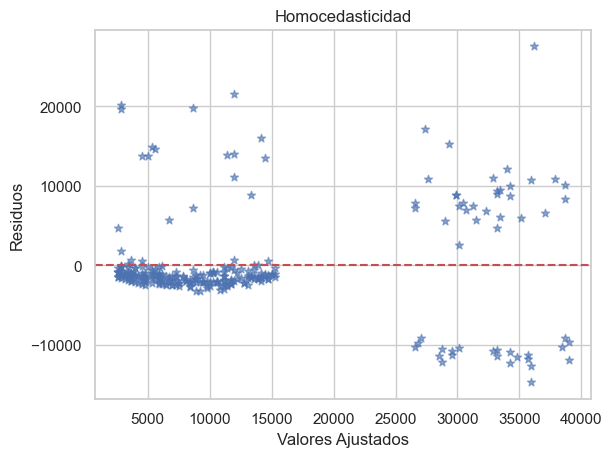

In [56]:
# Visualizar homocedasticidad 
plt.scatter(y_pred, error, marker='*', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [57]:
# Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, X_train)
lzip(names, test)

[('Lagrange multiplier statistic', 194.52646245733928),
 ('p-value', 5.7426901631258135e-43),
 ('f-value', 118.54141018617992),
 ('f p-value', 3.238975095568262e-47)]

El parámetro de Breusch-Pagan nos indica si hay homocedasticidad, en este caso el p-value es de prácticamente 0 por lo que **no hay homocedasticidad**, es decir hay heterocedasticidad, lo podemos confirmar viendo la gráfica.

#### <font color= #8FBC8F> **Normalidad**</font>

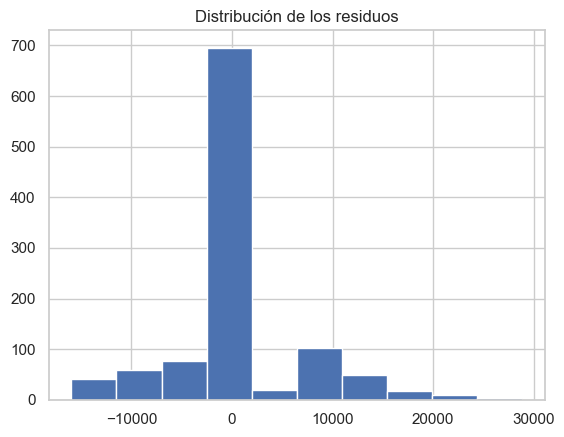

In [58]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(modelo.resid)
plt.title("Distribución de los residuos")
plt.show()

Text(0, 0.5, 'Cuantiles de los Residuos')

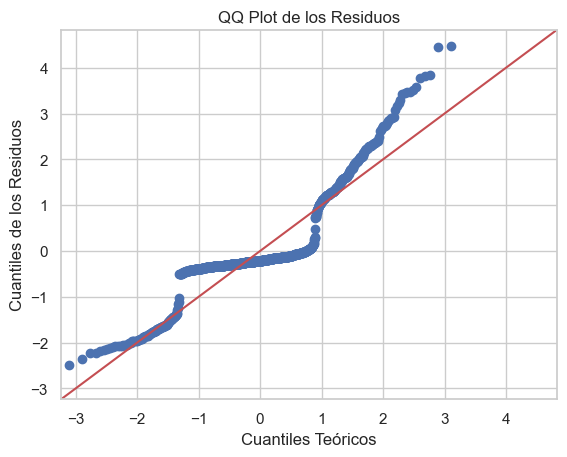

In [59]:
#%% QQ plot

qq_plot = sm.qqplot(modelo.resid, line='45', fit=True)

# Personalizar la apariencia del QQ plot
plt.title("QQ Plot de los Residuos")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")

In [60]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(modelo.resid)
lzip(names,test)

[(' Statistic', 0.8170060356997836), ('p-value', 3.459456356049116e-33)]

Al hacer la prubea de Shapiro-Wilk obtuvimos un p-value de 3.459456356049116e-33, es decir un valor cercano al cero, por lo que nos indica que los residuos no son normales.

##### <font color= #FFD8A8> **Modelo 2: Regresión lineal múltiple + Feature Selection** </font>

Al modelo original que se hizo anteriormente se agregará feature selection usando el método de envoltura de selección hacia adelante y hacia atrás para determinar de manera concreta y correcta cuáles variables le aportan más al modelo y no sólo basándonos en el análisis exploratorio que se hizo.

##### <font color= #96d9cf> **Regresión Lineal Scikit-Learn**</font>

##### <font color=  #c9d996> **Feature Selection**</font>

Es una técnica que sirve para identificar y seleccionar un subconjunto de características de un conjunto más amplio de datos, lo cual ayuda a reducir complejidad, mejorar la interpretabilidad e incrementar la precisión y evitar el sobreajuste.

Este tipo de métodos que se usarán para seleccionar hacen la selección de variables directamente en el proceso de ajuste del modelo evaluando el rendimiento con AIC y BIC. Justamente como queremos comparar modelos decidimos utilizar estos métodos.

In [61]:
#%% 3. Método de Envoltura: Forward Selection (Selección hacia adelante)
X = df.drop(columns='charges')
y = df['charges']

def forward_selection_regression(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        pvals = pd.Series(index=remaining_features, dtype=float)
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_with_const = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_with_const).fit()
            pvals[feature] = model.pvalues[feature]
        min_pval = pvals.min()
        if min_pval < significance_level:
            best_feature = pvals.idxmin()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

In [62]:
selected_forward = forward_selection_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Forward] Variables seleccionadas:", selected_forward)


[Envoltura - Forward] Variables seleccionadas: ['smoker_yes', 'age', 'bmi', 'children']


In [63]:
#%% 4. Método de Envoltura: Backward Elimination (Eliminación hacia atrás)
def backward_elimination_regression(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_with_const).fit()
        # Excluir la constante al evaluar los p-valores
        pvalues = model.pvalues.iloc[1:]
        max_pval = pvalues.max()
        if max_pval > significance_level:
            worst_feature = pvalues.idxmax()
            features.remove(worst_feature)
        else:
            break
    return features

In [64]:
selected_backward = backward_elimination_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Backward] Variables seleccionadas:", selected_backward)


[Envoltura - Backward] Variables seleccionadas: ['age', 'bmi', 'children', 'smoker_yes']


Como podemos observar los dos métodos de envoltura de selección de variables, resultan en las mismas variables para usar como predictoras del modelo, en este caso las 4 variables son edad, índice de masa corporal, el número de hijos o dependientes cubiertos por el seguro médico y si el paciente fuma.

Podemos comprobar que las variables seleccionadas tienen sentido ya que como vimos en el Análisis Exploratorio la edad es relevante ssegún el ANCOVA, el IMC es importante según las estadísticas descriptivas, si el paciente fuma o no lo vimos en la matriz de correlación ya que era la que estaba más relacionada con los gastos y se agregó el número de dependientes que tiene el seguro.

In [65]:
# Variable independiente
X = df[['smoker_yes', 'age', 'bmi', 'children']]
# Variable dependiente
y = df['charges']

In [66]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
# Modelo de regresión lineal
reg_lineal2 = linear_model.LinearRegression()
modelo2 = reg_lineal2.fit(X_train, y_train)
y_pred = reg_lineal2.predict(X_test)

##### <font color= #96d9cf> **Regresión Lineal Statsmodel**</font>

In [68]:
# Agregar una constante para el término independiente (B0)
X_train = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, X_train).fit()

print(modelo2.summary())

# Predicciones en los datos de prueba
X_test = sm.add_constant(X_test)
Y_pred = modelo2.predict(X_test)

print("Predicciones en los datos de prueba:")
print(Y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     762.1
Date:                Thu, 08 May 2025   Prob (F-statistic):          1.26e-310
Time:                        18:43:23   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1065   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.212e+04   1068.509    -11.340      0.0

##### <font color= #d4b1e6> **Validación y Análisis de criterios** </font>

- Según el modelo de statsmodel tenemos un coeficiente de determinación de 0.741, lo que indica que el modelo **explica el 74.1% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente, el índice de masa corporal, el número de niños o dependientes cubiertos por el seguro médico y si el paciente fuma. Es un buen coeficiente de determinación ya que más cercano a 1 significa que el modelo es capaz de explicar mejor la variabilidad de los datos. En comparación con el modelo pasado subió ligeramente de 0.71 a 0.74, por lo que las nuevas variables sí aportan significancia.

- El Criterio de Akaike (AIC) es de **2.17e^4**, el cual compararemos más adelante con los distintos modelos que se plantearán.

- El Criterio de Información Bayesiano (BIC) es de **2.173e^5** que de igual manera que el AIC será comparado más adelante con los otros modelos.

- El p-value t es de 0 para todas las variables, excepto para la variable dependientes cubiertos por el seguro la cual tiene un p-value t de 0.006 por lo tanto el coeficiente individual de todas las variables independientes, sí aportan **significancia** y tienen un impacto significativo en la variable dependiente, en este caso costo médico.

- El p.value de F-Statistic es **1.26e^-310**, el cual es prácticamente 0, lo que indica que los coeficientes en conjunto del modelo **sí son significativos**.

- El Prob Jarque-Bera Prob(JB) nos indica si los residuos son normales, en este caso fue de 2.55e^-135, el cual es prácticamente 0, lo que nos indica que los errores **no se distribuyen normalmente**. De igual manera el parámetro de Omnibus Prob(Omnibus) es de 0, por lo que nos confirma que los residuos **no se distribuyen de manera normal**.

- El parámetro de Durbi-Watson nos indica si hay independencia en los errores, un valor cercano a 2 es preferido. En este caso es de 2.086, el cual nos indica que **sí hay independencia en los errores**, es decir que hay ausencia de autocorrelación.

In [69]:
# Métricas de error para modelo 2 con scikit-learn
error=y_test-y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MAE: 4213.7986
MSE: 33981653.9502
R2: 0.7811


Analizando las métricas:

- **R2**: El coeficiente de determinación nos indica que el modelo **explica el 78.11% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente y si el paciente fuma. Podemos ver que es ligeramente mayor al modelo anterior de regresión lineal ya que subió de 0.75 a 0.78.  Esto podría indicar que el modelo con Feature Selection es más eficiente en la explicación de la variabilidad de los datos. De igual manera es mayor al modelo que se hizo con statsmodel y feature selection. 

- **MAE**: Es el error absoluto medio, el cual es de 4213.7986. En este caso la métrica subió en comparación con el modelo que se hizo anteriormente donde no aplicamos feature selection. Esto sugiere que, aunque el modelo puede no tener el mismo ajuste, sus errores absolutos son más pequeños en promedio.

- **MSE**: Es el error cuadrático medio, el cual es de 33981653.9502. En este caso a diferencia del MAE, el MSE bajó en comparación con el modelo anterior. Esto sugiere que al seleccionar las características más relevantes, el modelo ha logrado disminuir los errores grandes de mejor forma, lo que podría indicar que la selección de características ha evitado que el modelo haga grandes errores.

##### <font color= #96d9cf> **Cross-Validation**</font>

In [70]:
# Variable independiente
X = df[['smoker_yes', 'age', 'bmi', 'children']]
# Variable dependiente
y = df['charges']

In [71]:
modelo_cv2 = linear_model.LinearRegression()

In [72]:
cv_scores = cross_val_score(modelo_cv2, X, y, cv=5, scoring='r2')

In [73]:
print(f"Scores de R2 en cada pliegue: {cv_scores}")
print(f"Promedio de R2: {cv_scores.mean()}")

Scores de R2 en cada pliegue: [0.76148164 0.70878211 0.77626525 0.73135307 0.75675099]
Promedio de R2: 0.7469266088153267


In [74]:
cv_scores = cross_val_score(modelo_cv2, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Scores de MAE en cada pliegue: {-cv_scores}")
print(f"Promedio de MAE: {-cv_scores.mean()}")

Scores de MAE en cada pliegue: [4226.99330861 4214.32391245 4024.54948313 4295.57886556 4216.3717088 ]
Promedio de MAE: 4195.563455707428


In [75]:
cv_scores = cross_val_score(modelo_cv2, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de MSE en cada pliegue: {-cv_scores}")
print(f"Promedio de MSE: {-cv_scores.mean()}")

Scores de MSE en cada pliegue: [37065171.10692032 37824612.80900718 32836745.4072008  39880454.15299053
 36946849.65675195]
Promedio de MSE: 36910766.62657416


Analizando las métricas:

- **R2**: El coeficiente de determinación promedio nos indica que el modelo **explica el 74.69% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente y si el paciente fuma. Podemos ver en comparación con el cross-validation del modelo pasado, el coeficiente mejoró.

- **MAE**: Es el error absoluto medio, el cual es de 4195.563455707428. En este caso la métrica subió en comparación con el cross-validation del modelo pasado, al igual que lo vimos con las métricas de Scikit-learn.

- **MSE**: Es el error cuadrático medio, el cual es de 36910766.62657416. En este caso a diferencia del MAE, el MSE bajó en comparación con el cross-validation del modelo pasado, al igual que lo vimos con las métricas de scikit-learn de este modelo.

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

#### <font color= #8FBC8F> **Homocedasticidad**</font>

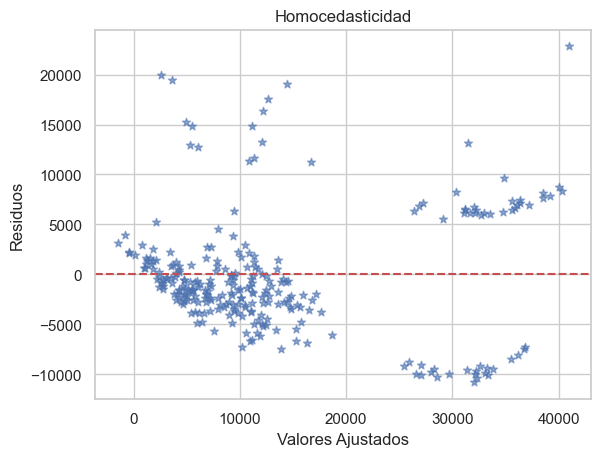

In [76]:
# Visualizar homocedasticidad 
plt.scatter(y_pred, error, marker='*', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [77]:
# Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo2.resid, X_train)
lzip(names, test)

[('Lagrange multiplier statistic', 87.93278134000774),
 ('p-value', 3.6184882952062385e-18),
 ('f-value', 23.839613609873197),
 ('f p-value', 6.595296705503492e-19)]

El parámetro de Breusch-Pagan nos indica si hay homocedasticidad, en este caso el p-value es de prácticamente 0 por lo que **no hay homocedasticidad**, es decir hay heterocedasticidad, lo podemos confirmar viendo la gráfica.

#### <font color= #8FBC8F> **Normalidad**</font>

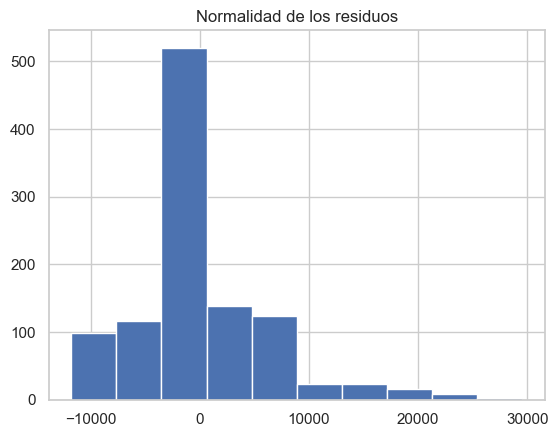

In [78]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(modelo2.resid)
plt.title("Normalidad de los residuos")
plt.show()

Text(0, 0.5, 'Cuantiles de los Residuos')

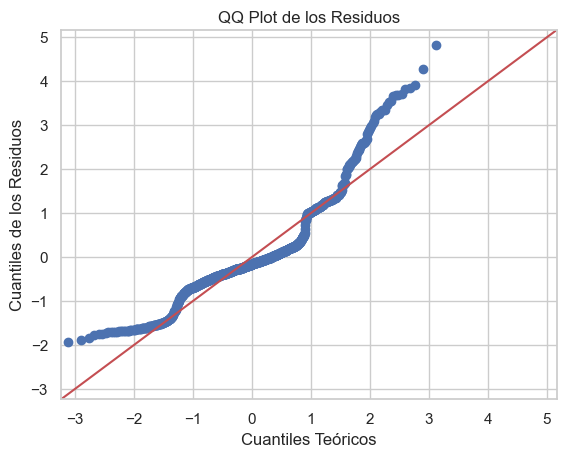

In [79]:
#%% QQ plot

qq_plot = sm.qqplot(modelo2.resid, line='45', fit=True)

# Personalizar la apariencia del QQ plot
plt.title("QQ Plot de los Residuos")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")

In [80]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(modelo2.resid)
lzip(names,test)

[(' Statistic', 0.8949837361463181), ('p-value', 2.1492108508201836e-26)]

Al hacer la prubea de Shapiro-Wilk obtuvimos un p-value de 2.1492108508201836e-26, es decir un valor cercano al cero, por lo que nos indica que los valores no son normales.

##### <font color= #FFD8A8> **Modelo 3: Regresión lineal + PCA** </font>

En este caso a diferencia del modelo pasado aplicaremos PCA, la cual es una técnica estadística que transforma un conjunto de variables correlacionadas en un nuevo conjunto de variables no correlacionadas denominadas componentes principales según la cantidad de varianza que explican.

Esta técnica ayuda a reducir dimensionalidad y quitar multicolinealidad.

En este caso haremos estandarización de las variables antes de aplicar PCA para evitar que el modelo sea afectado por las distintas escalas de las variables.

##### <font color= #96d9cf> **Regresión Lineal Scikit-Learn**</font>

In [81]:
X = df.drop(['charges', 'Id'], axis=1)
y = df['charges']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Queremos que la varianza acumulada explicada por los componentes principales sea mínimo del 90% ya que con esta varianza determinada no perderemos tanta información relevante. Es por esto por lo que no especificaremos el número de componentes principales y el modelo escojerá el número de componentes que explique dicha varianza.

In [84]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [85]:
modelo_pca = linear_model.LinearRegression()
modelo_pca.fit(X_train_pca, y_train)

LinearRegression()

In [86]:
y_pred = modelo_pca.predict(X_test_pca)

In [87]:
# Métricas de error para modelo 2 con scikit-learn
error=y_test-y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE con PCA: {mae:.4f}")
print(f"MSE con PCA: {mse:.4f}")
print(f"R2 con PCA: {r2:.4f}")

MAE con PCA: 4209.9759
MSE con PCA: 34000535.2319
R2 con PCA: 0.7810


Analizando las métricas:

- **R2**: El coeficiente de determinación promedio nos indica que el modelo **explica el 78.1% de la variablidad de los costos médicos**. Comparando con los 2 modelos anteriores dio mayor coeficiente que el primer modelo, mientras que en el de feature selection dio igual. Esto puede indicar que las variables seleccionadas por Feature Selection no estaban altamente correlacionadas, por lo que cada una contribuye de manera única a la predicción.

- **MAE**: Es el error absoluto medio, el cual es de 4209.9759. En este caso la métrica en comparación con los otros ha sido peor que la regresión lineal múltiple pero mejor que la regresión con feature selection. Esto se puede deber a que el rendimiento de PCA depende de la estructura de los datos, las variables originales no están tan correlacionadas y son informativas por sí mismas.

- **MSE**: Es el error cuadrático medio, el cual es de 34000535.2319. En este caso en comparación con los otros dos modelos el MSE fue mejor que la regresión lineal múltiple pero peor que la regresión con feature selection. Esto se puede deber a que Feature Selection escoge solo las variables más relevantes para la predicción, lo que generalmente lleva a un mejor rendimiento en cuanto al MSE.

##### <font color= #96d9cf> **Regresión Lineal Statsmodel**</font>

In [88]:
# Agregar una constante para el término independiente (B0)
X_train = sm.add_constant(X_train_pca)
model_pca = sm.OLS(y_train, X_train).fit()

print(model_pca.summary())

# Predicciones en los datos de prueba
X_test = sm.add_constant(X_test_pca)
Y_pred = model_pca.predict(X_test)

print("Predicciones en los datos de prueba:")
print(Y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     433.5
Date:                Thu, 08 May 2025   Prob (F-statistic):          4.32e-306
Time:                        18:43:25   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1062   BIC:                         2.175e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.699     71.104      0.0

- Según el modelo de statsmodel tenemos un coeficiente de determinación de 0.741, lo que indica que el modelo **explica el 74.1% de la variablidad de los costos médicos**. Comparando con los otros dos modelos, en la regresión lineal múltiple el coeficiente fue de 0.71, mientras que en el de regresión lineal múltiple con feature selection dio exactamente igual que en este modelo de PCA.

- El Criterio de Akaike (AIC) es de **2.171e^4**, el cual compararemos más adelante con los distintos modelos que se plantearán.

- El Criterio de Información Bayesiano (BIC) es de **2.175e^5** que de igual manera que el AIC será comparado más adelante con los otros modelos.

- El p-value t es de 0 para todos los componentes principales, excepto para el componente 7 que tiene un p-value t de 0.75, lo que indica que todos excepto este componente principal sí aportan **significancia** y tienen un impacto significativo en la variable dependiente, en este caso costo médico.

- El p.value de F-Statistic es **4.32e^-306**, el cual es prácticamente 0, lo que indica que los coeficientes en conjunto del modelo **sí son significativos**.

- El Prob Jarque-Bera Prob(JB) nos indica si los residuos son normales, en este caso fue de 1.79e^-133, el cual es prácticamente 0, lo que nos indica que los errores **no se distribuyen normalmente**. De igual manera el parámetro de Omnibus Prob(Omnibus) es de 0, por lo que nos confirma que los residuos **no se distribuyen de manera normal**.

- El parámetro de Durbi-Watson nos indica si hay independencia en los errores, un valor cercano a 2 es preferido. En este caso es de 2.085, el cual nos indica que **sí hay independencia en los errores**, es decir que hay ausencia de autocorrelación.

In [89]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.18645863 0.16641183 0.14048665 0.13335965 0.12060724 0.11274962
 0.09983156]


In [90]:
w,v = np.linalg.eig(pca.get_covariance()) # Obtener vectores para la matriz de covarianza
w=np.abs(w)
indx = np.argsort(w)[::-1] 
porcentaje = w[indx]/np.sum(w) # Convertir a %
porcent_acum = np.cumsum(porcentaje) # Acumulada
porcent_acum

array([0.18645863, 0.35287046, 0.49335711, 0.62671676, 0.747324  ,
       0.86007362, 0.95990517, 1.        ])

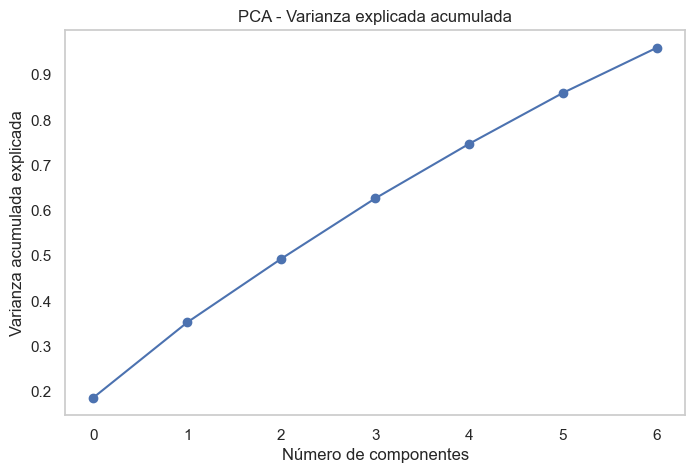

In [91]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('PCA - Varianza explicada acumulada')
plt.grid()
plt.show()

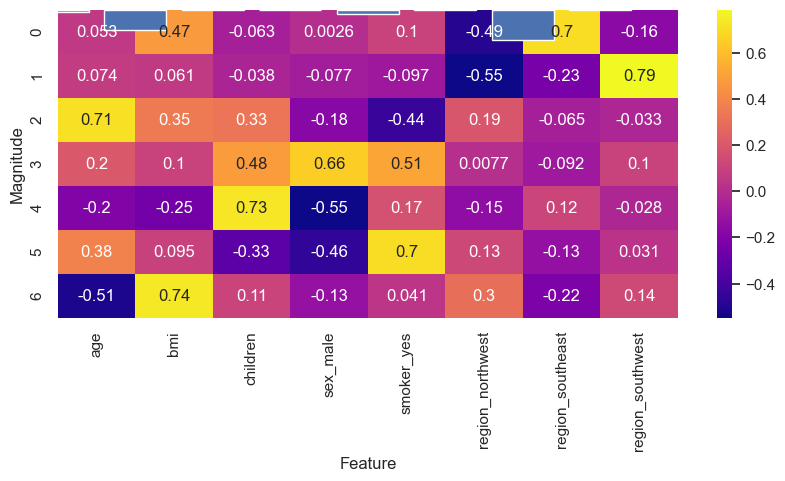

In [92]:
matrix_transform = pca.components_.T
x = df.drop(['charges', 'Id'], axis = 1)
feature_names = x.columns.tolist()
heat_df = pd.DataFrame(pca.components_, columns=feature_names)

plt.figure(figsize=(10, 4))
sns.heatmap(heat_df, cmap='plasma', annot=True, cbar=True)
plt.bar(np.arange(8),matrix_transform[:,0])
plt.xlabel('Feature')
plt.ylabel('Magnitude')
plt.show()

El máximo de componentes principales que se pudieran obtener son 8 ya que tenemos 8 variables. En este caso tenemos 7 componentes principales por lo que se redujo una dimensión , es decir, al menos una de las variables originales no aporta información nueva y podría estar correlacionada con otras o tener una varianza muy baja.

Con el pca se logró descomponer la información.

Con esta gráfica podemos ver  las relaciones entre las variables originales y los componentes principales generadas por el PCA. Muestra cómo cada variable contribuye a los componentes principales a través del mapa de calor y las magnitudes en el gráfico de barras.

En Componente 0 podemos ver que:

- Las variables que más contribuyen al componente son `region_southeast` con 0.7, `region_northwest` con -0.49 y `bmi`   con 0.47


En Componente 1 podemos ver que:

- Las variables que más contribuyen al componente son `region_southwest` con 0.79 y `region_northwest` con -0.55.

En Componente 2 podemos ver que:

- Las variables que más contribuyen al componente son `age` con 0.71 y `smoker_yes` con -0.44. 

En Componente 3 podemos ver que:

- Las variables que más contribuyen al componente son `sex_male` con 0.66 y `smoker_yes` con 0.51. 

En Componente 4 podemos ver que:

- Las variables que más contribuyen al componente son `children` con 0.73 y `sex_male` con -0.55. 

En Componente 5 podemos ver que:

- Las variables que más contribuyen al componente son `smoker_yes` con 0.7 y `sex_male` con -0.46. 

En Componente 6 podemos ver que:

- Las variables que más contribuyen al componente son `bmi` con 0.74 y `age` con -0.51. 

##### <font color= #96d9cf> **Cross-Validation**</font>

In [93]:
X = df.drop(['charges', 'Id'], axis=1)
y = df['charges']

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
X_pca = pca.fit_transform(X_scaled)

In [96]:
modelo_cv3 = linear_model.LinearRegression()

In [97]:
cv_scores = cross_val_score(modelo_cv3, X_pca, y, cv=5, scoring='r2')

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

#### <font color= #8FBC8F> **Homocedasticidad**</font>

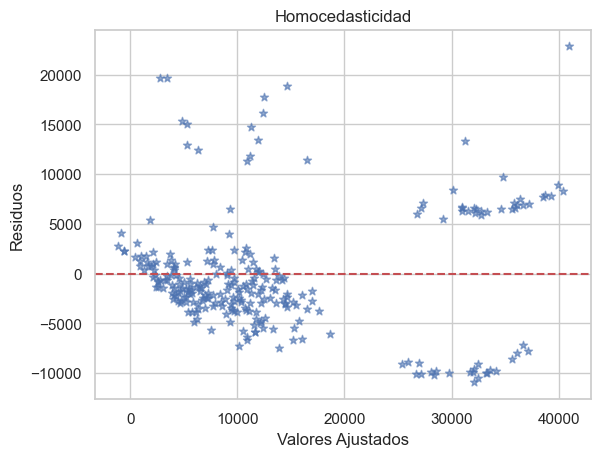

In [98]:
# Visualizar homocedasticidad 
plt.scatter(y_pred, error, marker='*', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [99]:
# Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_pca.resid, X_train)
lzip(names, test)

[('Lagrange multiplier statistic', 93.1898484645152),
 ('p-value', 2.733812479043746e-17),
 ('f-value', 14.473878341038974),
 ('f p-value', 4.4935938510286975e-18)]

El parámetro de Breusch-Pagan nos indica si hay homocedasticidad, en este caso el p-value es de prácticamente 0 por lo que **no hay homocedasticidad**, es decir hay heterocedasticidad, lo podemos confirmar viendo la gráfica.

#### <font color= #8FBC8F> **Normalidad**</font>

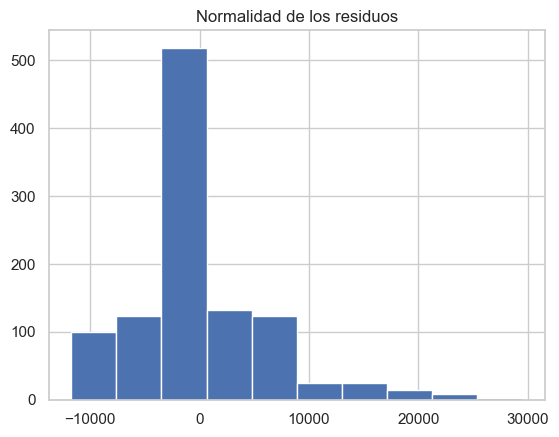

In [100]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(model_pca.resid)
plt.title("Normalidad de los residuos")
plt.show()

Text(0, 0.5, 'Cuantiles de los Residuos')

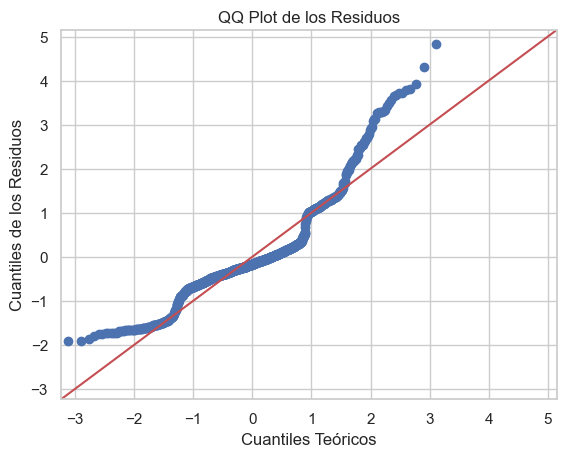

In [101]:
#%% QQ plot

qq_plot = sm.qqplot(model_pca.resid, line='45', fit=True)

# Personalizar la apariencia del QQ plot
plt.title("QQ Plot de los Residuos")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")

In [102]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(model_pca.resid)
lzip(names,test)

[(' Statistic', 0.8947576287110468), ('p-value', 2.0302528174779755e-26)]

Al hacer la prubea de Shapiro-Wilk obtuvimos un p-value de 2.1492108508201836e-26, es decir un valor cercano al cero, por lo que nos indica que los valores no son normales.

### <font color=  #003366> **Comparación de modelos**</font>

###### <font color= #d4b1e6> **En cuanto a verificación de supuestos** </font>

| Modelo | Linealidad | Normalidad | Homocedasticidad | Independencia |
|-----------|-----------|-----------|-----------|-----------|
| Regresión múltiple   | Sí    | No   | No    | Sí     |
| Regresión múltiple + feature selection    | Sí     | No    |  No   |Sí     |
| Regresión múltiple + PCA   | Sí     | No    | No    | Sí     |


Como pdemos ver en cuanto a cumplimiento de supuestos del modelos, todos los modelos fueron iguales, sí eran lineales e independientes pero no homocedásticos ni normales.

###### <font color= #d4b1e6> **En cuanto a métricas de rendimiento** </font>

| Modelo | R2 | MAE | MSE | AIC | BIC|
|-----------|-----------|-----------|-----------|-----------|-----------|
| Regresión múltiple   | 0.713    |  3990.9795  | 382746699.67     |   2.181e^4  |  2.183e^5    |
| Regresión múltiple + feature selection    | 0.741     |   4213.7986 |  33981653.9502   | 2.17e^4   | 2.173e^5     |
| Regresión múltiple + PCA   | 0.741     | 4209.9759    | 34000535.2319    |  2.171e^4  |  2.175e^5   |

###### <font color= #d4b1e6> **En cuanto a Cross-Validation** </font>

| Modelo | R2 | MAE | MSE |
|-----------|-----------|-----------|-----------|
| Regresión múltiple   | 0.7191    |  4128.01  | 40995471.25     |
| Regresión múltiple + feature selection    | 0.7469     |   4195.56 |  36910766.62   |
| Regresión múltiple + PCA   |      |    |     |

Tras comparar tres modelos de regresión: **regresión múltiple**, **regresión múltiple con selección de variables** y **regresión múltiple con PCA** se puede observar que el modelo con feature selection tiene el mejor equilibrio entre precisión y simplicidad. Aunque la regresión múltiple obtuvo el menor MAE, el modelo con feature selection logró un mayor R2 y el menor MSE, lo que indica que es el mejor modelo para predecir, especialmente para errores grandes. Además, obtuvo los valores más bajos en los criterios AIC y BIC, lo que nos dice que es el modelo más eficiente en cuanto a ajuste y complejidad. 

Por lo tanto, se concluye que la **regresión múltiple con selección de variables** es el modelo más adecuado para predecir los costos médicos en este análisis.



### <font color=  #003366> **Resultados**</font>

Tomando en cuenta el análisis exploratorio, la comparación de modelos y viendo que el mejor modelo tomando en cuenta el ajuste y complejidad fue el de la regresión lineal múltiple con feature selection, podemos ver que los factores que más influyen en los gastos médicos de una persona alrededor de 18 y 70 años son la edad, el índice de masa corporal, si la persona fuma o no fuma, y el número de hijos o dependientes cubiertos por el seguro médico, mientras que la región de la persona no influye.

Todos estos aspectos importan en cuánto influyen los costos médicos de una persona, esto es sumamente importante ya que conocer los factores que influencian los gastos es esencial, sobretodo aquí en México por nuestras condiciones de salud. 

Por ejemplo una persona que fume y que tenga un índice de masa corporal que no esté en el rango en cuanto a su peso y altura es altamente probable que sus gastos sean mayores a los de un joven que no fuma y que está dentro de su rango de IMC. 

Estos hallazgos pueden servir para concientizar en cuanto a la salud de las personas y sobretodo nos puede ayudar para identificar los perfiles de los pacientes que tienen más riesgo y que por lo tanto sus gastos serán mayores.

Es útil ya que relacionando estilos de vida podemos comprender los aspectos de riesgo, a anticipar costos futuros relacionados a la salud.

Ahora aplicándolo a México:

Viendo la situación de México: Muchas personas no tienen seguro médico o cuentan con servicios limitados.

La presencia de enfermedades prevenibles relacionadas con el estilo de vida (como el tabaquismo o el sobrepeso) aumenta los costos médicos. México es el primer país en obesidad infantil y el segundo en obesidad en adultos por lo que los gastos médicos para mexicanos con estas condiciones serán altos.

Modelos como los que hicimos nosotras pueden ayudar a concientizar sobre estos problemas y ver cómo estas condiciones afectan los gastos médicos.

### <font color=  #003366> **Conclusiones**</font>

Se logró realizar el proyectro final sobre el tema de nuestra elección que fue **Medical Cost**, donde se realizaron varios modelos, entre ellos la combinación de modelos para  obtener el mejor resultado de métricas. 

Se aplicaron los conocimientos vistos en el transcurso del semestre, ya que al ser el último trabajo, se recurrió a la implementación de varios temas que se impartieron en nuestra clase como ANOVA, ANCOVA, feature selection, PCA, etc.

Durante la elaboración del proyecto pudimos aplicar conocimientos previos ya que no sólo fue el modelado, sino que se empezó por el preprocesamiento de datos para ver si era necesaria alguna limpieza o transformación, seguido por el Análisis Exploratorio donde visualizamos distribuciones, outliers, etc. Posteriormente seguimos con el modelado y comparación de modelos para llegar a hallazgos y conclusiones.

A lo largo del proyecto se tuvo que analizar de manera detallada cada uno de los modelos propuestos, empezando por el más sencillo que era la regresión lineal múltiple donde escogimos variables únicamente basándonos en el EDA donde pudimos implementar temas como ANOVA y ANCOVA para sacar conclusiones preliminares de cuáles variables parecían que no tenían una significancia en cuando a los gastos médicos. Con estas técnicas nos pudimos dar cuenta de que las regiones no influyen en los gastos del paciente.

Posteriormente implementamos feature selection mediante los métodos de envoltura de selección hacia adelante y hacia atrás. 

Por último implementamos PCA para reducir la dimensionalidad de los datos, aunque es cierto que no contábamos con muchas variables, PCA ayuda también a eliminar el ruido, a hacer un análisis de correlación. Al analizar cómo contribuye cada variable a los componentes nos percatamos de que en los dos primeros componentes predominaban las regiones y por eso fue interesante comparar este modelo con los otros dos.

Con estos tres modelos pudimos hacer comparaciones para ver cuál fue el mejor modelo, el cual resultó ser el modelo de selección de variables ya que nos dio las mejores métricas de desempeño en el modelo considerando ajuste y complejidad. 
Cabe recalcar también que en cada uno de los modelos se verificó si se cumplían los supuestos o no, de igual manera para la regresión lineal múltiple y para la regresión lineal con selección de variables se hizo validación cruzada.

Se aplicó código y visuales para la mejor comprensión de nuestros resultados y de detalles que se necesitaban para el entendimiento del proceso y así poder reforzar y seguir mejorando en la programación y análisis de datos.
Fue un reto hacer este proyecto ya que no todo fue fácil, pero con el trabajo en equipo, recurrir a nuestras notas, trabajos pasados y el profesor se logró sacar adelante este proyecto para demostrar nuestras capacidades. 

Por último se realizó una presentación para exponer los resultados y poner a prueba nuestras habilidades blandas, saber exponer nuestro trabajo de manera no técnica a personas que no puedan entender por completo todo lo que conlleva el código o términos de ello para prepararnos en un futuro trabajo u oportunidades.

